In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Define the stock symbol and time frame
symbol = "AAPL"  # Replace with your desired stock symbol
start_date = "2020-01-01"
end_date = "2021-12-31"

In [3]:
# Retrieve stock data from Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date, progress=False)


In [4]:
# Extract the closing prices
closing_prices = data['Adj Close']

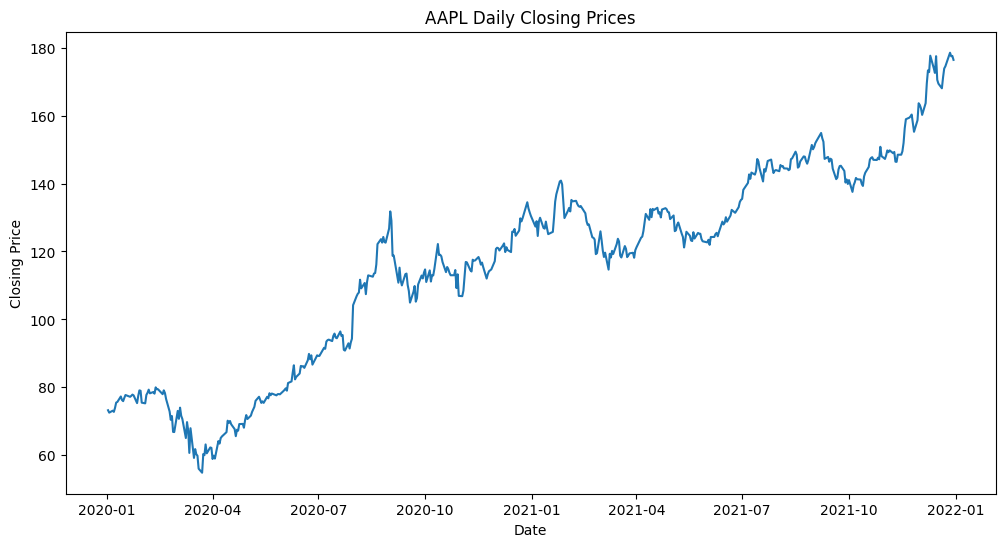

In [5]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(closing_prices)
plt.title(f"{symbol} Daily Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

In [8]:
# Perform ARIMA analysis
# Example: ARIMA(1,1,1)
order = (1, 1, 1)
model_arima = ARIMA(closing_prices, order=order)
results_arima = model_arima.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [9]:
# Perform SARIMA analysis
# Example: SARIMA(1,1,1)(1,1,1,12)
order_sarima = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model_sarima = SARIMAX(closing_prices, order=order_sarima, seasonal_order=seasonal_order)
results_sarima = model_sarima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [10]:
# Generate forecasts
forecast_steps = 30  # Number of steps to forecast
forecast_arima = results_arima.forecast(steps=forecast_steps)
forecast_sarima = results_sarima.get_forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


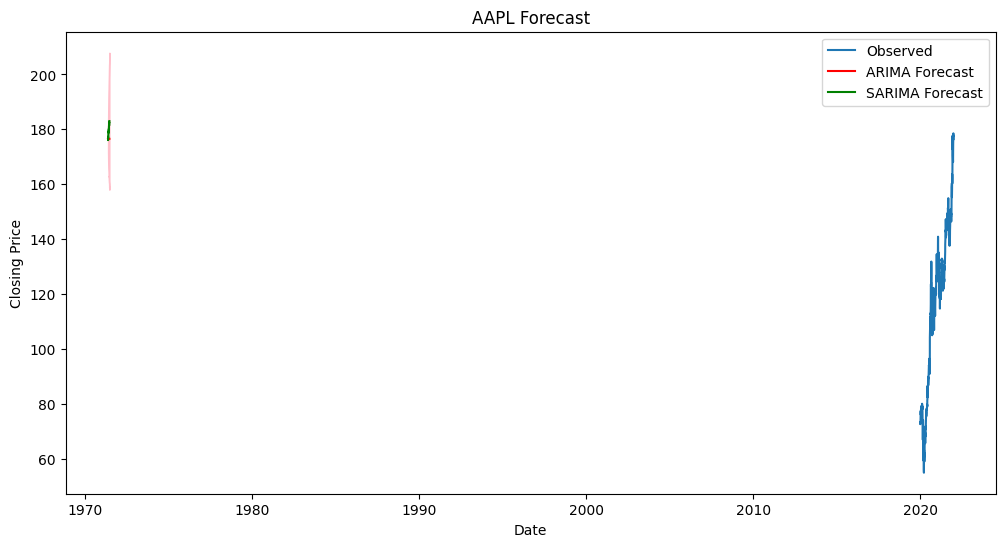

In [11]:
# Plot the observed and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(closing_prices, label='Observed')
plt.plot(forecast_arima, label='ARIMA Forecast', color='r')
plt.plot(forecast_sarima.predicted_mean, label='SARIMA Forecast', color='g')
forecast_sarima_ci = forecast_sarima.conf_int()
plt.fill_between(forecast_sarima_ci.index, forecast_sarima_ci.iloc[:, 0], forecast_sarima_ci.iloc[:, 1], color='pink')
plt.title(f"{symbol} Forecast")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()